<a href="https://colab.research.google.com/github/Dev-anish1/Comparative-Analysis-of-Image-Segmentation-Techniques/blob/main/MFG_598_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

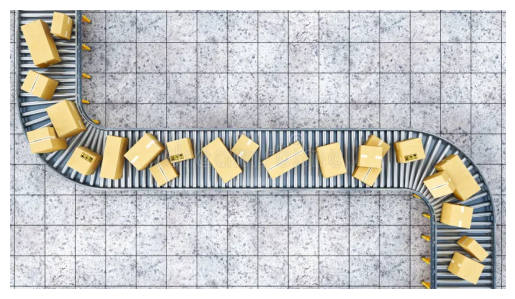

Applying Otsu's Thresholding:


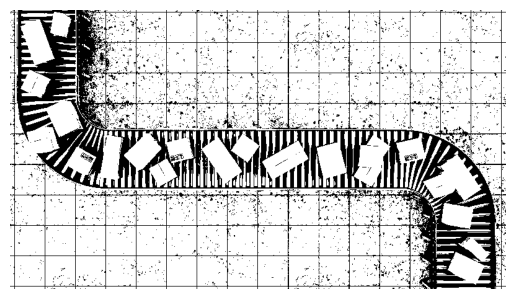

Duration for Otsu's Method: 0.18 seconds
Applying Adaptive Thresholding:


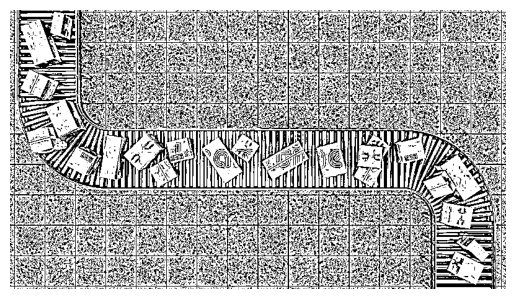

Duration for Adaptive Method: 0.23 seconds


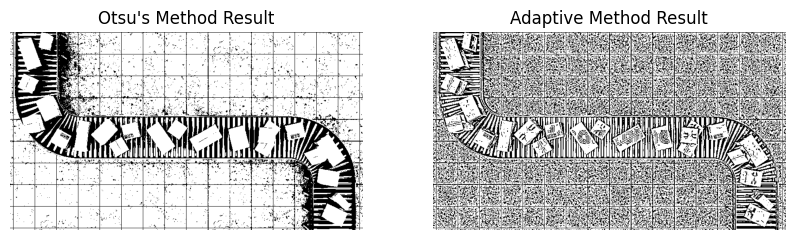

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import time

# -------------------------
# Define Functions
# -------------------------

def load_and_display_image(path_to_image):
    # Read and show an image from the specified path
    img = cv2.imread(path_to_image)
    if img is None:
        print("Image not found.")
        return None
    converted_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(converted_img)
    plt.axis('off')
    plt.show()
    return img

def apply_otsu_thresholding(input_image):
    # Use Otsu's method to threshold the input image
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    _, binarized_img = cv2.threshold(grayscale, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    plt.imshow(binarized_img, cmap='gray')
    plt.axis('off')
    plt.show()
    return binarized_img

def apply_adaptive_thresholding(input_image):
    # Use Adaptive Thresholding on the input image
    grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    adaptive_img = cv2.adaptiveThreshold(grayscale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)
    plt.imshow(adaptive_img, cmap='gray')
    plt.axis('off')
    plt.show()
    return adaptive_img

def time_and_evaluate_segmentation(seg_function, input_image, name_of_method):
    # Measure the time it takes to segment the image
    start = time.time()
    result_img = seg_function(input_image)
    end = time.time()
    time_taken = end - start
    print(f"Duration for {name_of_method}: {time_taken:.2f} seconds")
    return result_img

# -------------------------
#  Main Function
# -------------------------

def main():
    path_to_img = '/content/cvbelt.webp'  # Change to the path of your image
    img_loaded = load_and_display_image(path_to_img)

    if img_loaded is not None:
        print("Applying Otsu's Thresholding:")
        otsu_result = time_and_evaluate_segmentation(apply_otsu_thresholding, img_loaded, "Otsu's Method")
        print("Applying Adaptive Thresholding:")
        adaptive_result = time_and_evaluate_segmentation(apply_adaptive_thresholding, img_loaded, "Adaptive Method")

        # Show the segmented images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(otsu_result, cmap='gray')
        plt.title("Otsu's Method Result")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(adaptive_result, cmap='gray')
        plt.title("Adaptive Method Result")
        plt.axis('off')

        plt.show()

# -------------------------
# Run Program
# -------------------------

if __name__ == "__main__":
    main()
